# Mental Health in Tech Survey 2014

## Input

### Libraries and source csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ds = pd.read_csv("data/mental-health-in-tech-survey.csv")
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Cleaning

### Examining columns

In [2]:
ds.columns = [col.lower().replace(" ", "_") for col in ds.columns] #making it uniform
ds.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [3]:
# The survey description indicates that it was aimed at all those
# working in the tech industry, not just those suffering from some form
# of mental illness. Is this possible to determine from the dataset?

ds["treatment"].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [4]:
ds["work_interfere"].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [5]:
# Has everyone who hasn't sought treatment reported that 
# mental issues/disorders have never interfered with their work?
ds[(ds["treatment"]=="No") & (ds["work_interfere"]=="Never")].shape[0]

183

In [6]:
# So there are people not getting treatment who suffer from some form of illness
#
# if treatment==Yes then has_illness
# if treatment==No but work_interfere then has_illness
# if both are negative (No/Never) then it's inconclusive -> assume has_illness=False
ds["has_illness"] = ds.apply(lambda x: (x["treatment"]=="Yes" or x["work_interfere"] in ["Rarely", "Sometimes", "Often"]), axis=1)
ds.head()

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,has_illness
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,True
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,True
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,True
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,True
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,False


In [7]:
# Gender classification column is messy...
# Normalising

ds["ngender"] = ds["gender"].str.replace("cis", "").str.strip("-").str.strip()
# one cis remained?? adjusting replace in "female" section

# male
ds["ngender"] = np.where(ds["ngender"].str.lower().str.startswith("m"), "male", ds["ngender"].str.lower())
ds["ngender"] = np.where(ds["ngender"].str.lower().str.contains(" male"), "male", ds["ngender"].str.lower())
ds["ngender"] = np.where(ds["ngender"].str.lower().str.contains(" man"), "male", ds["ngender"].str.lower())
ds["ngender"] = np.where(ds["ngender"].str.lower().str.contains("guy"), "male", ds["ngender"].str.lower())

# female
ds["ngender"] = np.where(((ds["ngender"].str.lower().str.startswith("f")) | (ds["ngender"].str.lower().str.contains("fem"))) & ~(ds["ngender"].str.lower().str.contains("trans")), "female", ds["ngender"].str.lower())
ds["ngender"] = np.where((ds["ngender"].str.lower().str.contains("woman")) & ~(ds["ngender"].str.lower().str.contains("trans")), "female", ds["ngender"].str.lower())

# given the reduced number of each category in relation to the total population,
# binning as "other". This category also includes unknowns
ds["ngender"] = np.where((ds["ngender"].str.lower()=="male") | (ds["ngender"].str.lower()=="female"), ds["ngender"], "other")

ds["ngender"].value_counts()

male      995
female    248
other      16
Name: ngender, dtype: int64

In [8]:
# country names ok?
ds["country"].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [9]:
# Any weird ages?
ds["age"].unique()

# Yes, there are! Let's keep them for now, as age might not be relevant to some analyses
ds["nage"] = np.where((ds["age"]<0) | (ds["age"]>100), -1, ds["age"])

In [10]:
# self_employed ok?
print(ds["self_employed"].unique())
print(ds["self_employed"].isna().sum())

[nan 'Yes' 'No']
18


In [11]:
# what's up with NaN?
# so... no_employees = "How many employees does your company or organization have?"
# does NaN mean unemployed?
ds[(ds["self_employed"].isna())][["no_employees", "work_interfere", "remote_work", "tech_company", "benefits"]]

,no_employees,work_interfere,remote_work,tech_company,benefits
0,6-25,Often,No,Yes,Yes
1,More than 1000,Rarely,No,No,Don't know
2,6-25,Rarely,No,Yes,No
3,26-100,Often,No,Yes,No
4,100-500,Never,Yes,Yes,Yes
5,6-25,Sometimes,No,Yes,Yes
6,1-5,Sometimes,Yes,Yes,No
7,1-5,Never,Yes,Yes,No
8,100-500,Sometimes,No,Yes,Yes
9,26-100,Never,No,Yes,Don't know


In [12]:
# Clearly, the people who have self_employed==NaNs are working (no_employees, work_interfere)
# and it is safe to assume that almost half of them have an employer because they do not know
# whether or not the company offers health benefits.
# These can be safely filled with "No". The ones that remain unknown are few and can be dropped.
# For now they will be kept as NaN because not all points of analysis will depend on this column.
ds["self_employed"] = np.where((ds["self_employed"].isna()) & (ds["benefits"]=="Don't know"), "No", ds["self_employed"])
ds.isna().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  11
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
has_illness                     0
ngender                         0
nage          

In [13]:
# work_interfere also has many NaNs
# how are these in the has_illness column?
ds[ds["work_interfere"].isna()]["has_illness"].value_counts()

False    260
True       4
Name: has_illness, dtype: int64

In [14]:
# So most seem to be the healthy type (= not getting treatment)
# These values will need to be taken into consideration during analysis later on.
# The NaN rows might need to be dropped.

In [15]:
# What about all those "Yes"/"No" columns? Any chance that they can be converted to 1/0?

yn_cols = ['self_employed','family_history','treatment','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','mental_health_consequence', 'phys_health_consequence', 'coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical', 'obs_consequence']
for col in yn_cols:
    print(col, ds[col].unique())

# some can
pureyn = ['self_employed','family_history','treatment','remote_work','tech_company','obs_consequence']
ds[pureyn] = ds[pureyn]=='Yes'


self_employed [nan 'No' 'Yes']
family_history ['No' 'Yes']
treatment ['Yes' 'No']
remote_work ['No' 'Yes']
tech_company ['Yes' 'No']
benefits ['Yes' "Don't know" 'No']
care_options ['Not sure' 'No' 'Yes']
wellness_program ['No' "Don't know" 'Yes']
seek_help ['Yes' "Don't know" 'No']
anonymity ['Yes' "Don't know" 'No']
mental_health_consequence ['No' 'Maybe' 'Yes']
phys_health_consequence ['No' 'Yes' 'Maybe']
coworkers ['Some of them' 'No' 'Yes']
supervisor ['Yes' 'No' 'Some of them']
mental_health_interview ['No' 'Yes' 'Maybe']
phys_health_interview ['Maybe' 'No' 'Yes']
mental_vs_physical ['Yes' "Don't know" 'No']
obs_consequence ['No' 'Yes']


### Columns to keep an eye on after cleaning:
* self_employed
* work_interfere
* nage

## Question: What kind of differences in approach to mental illness are there between genders?

In [16]:
# Gender issues are culturally-sensitive but most respondents are from western countries
# that share a common (or at least comparable) cultural matrix, so the country data is
# assumed to be irrelevant to the question.

# Relevant columns:
cols = ["ngender", "has_illness", "treatment", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview"]

q1 = ds[cols].copy()
q1

,ngender,has_illness,treatment,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview
0,female,True,True,No,No,Some of them,Yes,No,Maybe
1,male,True,False,Maybe,No,No,No,No,No
2,male,True,False,No,No,Yes,Yes,Yes,Yes
3,male,True,True,Yes,Yes,Some of them,No,Maybe,Maybe
4,male,False,False,No,No,Some of them,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...
1254,male,True,True,No,No,Some of them,Some of them,No,No
1255,male,True,True,No,No,Some of them,Yes,No,No
1256,male,True,True,Yes,Yes,No,No,No,No
1257,female,False,False,Yes,No,No,No,No,No


In [17]:
# How many of each gender are there?
q1["ngender"].value_counts()

male      995
female    248
other      16
Name: ngender, dtype: int64

In [18]:
# There are approx. 4 times more men than women
# Dropping "others", as there are too few to form conclusions about them

q1 = q1[q1["ngender"]!="other"]

total_f = q1[q1["ngender"]=="female"].shape[0]
total_m = q1[q1["ngender"]=="male"].shape[0]
total = q1.shape[0]

print(total, total_f, total_m)

1243 248 995


### 1. In case of illness, what proportion of each gender has sought treatment?

In [19]:
table = q1[q1["has_illness"]][["ngender", "treatment"]].copy()
tgrouped = table.groupby(["ngender"], as_index=False).agg({"treatment":"sum"})
tgrouped["treatment"] = tgrouped.apply(lambda x: x["treatment"]*100/total_f if x["ngender"]=="female" else x["treatment"]*100/total_m, axis=1)
tgrouped

,ngender,treatment
0,female,68.951613
1,male,45.427136


At 68.9 %, women are more likely to seek treatment than men (45.4 %).

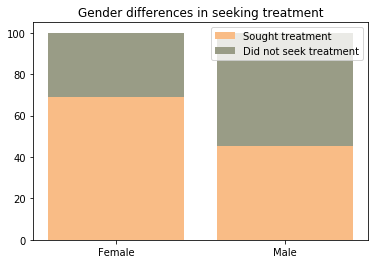

In [20]:
# plot
tgrouped["no_treatment"] = 100-tgrouped["treatment"]

x = [0, 1]
y1 = list(tgrouped["treatment"])
y2 = list(tgrouped["no_treatment"])

plt.bar(x, y1, color='#f9bc86', label="Sought treatment", width=0.8)
plt.bar(x, y2, bottom=y1, label="Did not seek treatment", color='#999c86', width=0.8)
plt.title("Gender differences in seeking treatment")
plt.xticks(x, ["Female", "Male"])
#plt.yticks([])
plt.legend(loc="best")

plt.show()

### 2. How willing is each gender to talk about these issues?

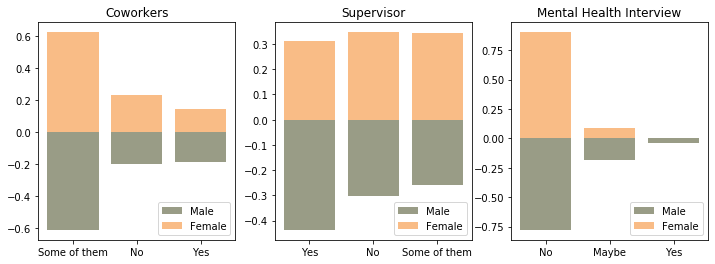

In [21]:
table = q1[["ngender", "coworkers", "supervisor", "mental_health_interview"]].copy()

tab_f = table[table["ngender"]=="female"].copy()
tab_m = table[table["ngender"]=="male"].copy()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
cols = ["coworkers", "supervisor", "mental_health_interview"]

for i, col in enumerate(cols):
    m = tab_m[col].value_counts()/total_m*(-1)
    f = tab_f[col].value_counts()/total_f

    axs[i].bar(m.index, m.values, color="#999c86", label="Male")
    axs[i].bar(f.index, f.values, color="#f9bc86", label="Female")
    axs[i].set_title(col.title().replace("_", " "))
    axs[i].legend(loc='lower right')

plt.show()

### 3. Are there differences in the belief that discussing a mental/physical health issue with their employer would have negative consequences?

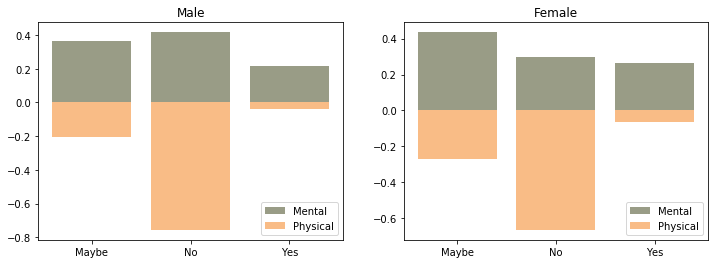

In [22]:
table = q1[["ngender", "mental_health_consequence", "phys_health_consequence"]].copy()

tab_f = table[table["ngender"]=="female"].copy()
tab_m = table[table["ngender"]=="male"].copy()

m1 = (tab_m["mental_health_consequence"].value_counts()/total_m).sort_index()
f1 = (tab_f["mental_health_consequence"].value_counts()/total_f).sort_index()
m2 = (tab_m["phys_health_consequence"].value_counts()/total_m*(-1)).sort_index()
f2 = (tab_f["phys_health_consequence"].value_counts()/total_f*(-1)).sort_index()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].bar(m1.index, m1.values, color="#999c86", label="Mental")
axs[0].bar(m2.index, m2.values, color="#f9bc86", label="Physical")

axs[1].bar(f1.index, f1.values, color="#999c86", label="Mental")
axs[1].bar(f2.index, f2.values, color="#f9bc86", label="Physical")

axs[0].set_title("Male")
axs[1].set_title("Female")
axs[0].legend(loc='lower right')
axs[1].legend(loc='lower right')

plt.show()